In [ ]:
# Following lesson from https://www.youtube.com/watch?v=uxMvHSUOZzc

# This Python programms classifies patients on having and non-having Chronic Kidney Disease via neural networks (NN)
# Dataset could be downloaded from here https://www.kaggle.com/mansoordaku/ckdisease or
# https://www.kaggle.com/akshayksingh/kidney-disease-dataset
# It contains 400 rows and 26 features and have some missig values

# import libraries
import glob
from keras.models import Sequential, load_model
import numpy as np
import pandas as pd
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt
import keras as k



In [ ]:
# Load the data
from google.colab import files
uploaded = files.upload()
# this library allows us to upload data from our computer
df = pd.read_csv('kidney_disease.csv')




Saving kidney_disease.csv to kidney_disease (2).csv


In [ ]:
#Print first 4 rows of the dataset
df.head(4)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd


In [ ]:
#  Get the shape of the data (the number of rows & columns)
df.shape

(400, 26)

In [ ]:
# Create a list of column names to keep
columns_to_retain = ['sg', 'al', 'sc', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'classification']

# create the new dataset
# drop all other columns, keep only columns_to_retain
df = df.drop([col for col in df.columns if not col in columns_to_retain], axis=1)


In [ ]:
# Drop the rows with na or missing values
df = df.dropna(axis=0)

In [ ]:
# Transform the non-numeric data to numerical
for column in df.columns:
   if df[column].dtype==np.number:
     continue
   df[column] = LabelEncoder().fit_transform(df[column])
     

In [ ]:
# Print the first 8 rows
df.head(8)


,sg,al,sc,hemo,pcv,htn,classification
0,1.020,1.0,1.2,15.4,28,1,0
1,1.020,4.0,0.8,11.3,22,0,0
2,1.010,2.0,1.8,9.6,15,0,0
3,1.005,4.0,3.8,11.2,16,1,0
4,1.010,2.0,1.4,11.6,19,0,0
5,1.015,3.0,1.1,12.2,23,1,0
6,1.010,0.0,24.0,12.4,20,0,0
7,1.015,2.0,1.1,12.4,28,0,0


In [ ]:
# Split the data into dependent (X) dataset (also called features) and dependent (y) datasets
X = df.drop(['classification'], axis =1 )
y = df['classification'] 

In [ ]:
# Feature scaling
# min-max scaler method scales the data set so that all the input features lie in [0,1]
x_scaler = MinMaxScaler()
x_scaler.fit(X)
column_names = X.columns
X[column_names] = x_scaler.transform(X)

In [ ]:
# Split the data into 80% training and 20% testing and shuffle
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)


In [ ]:
# Build the model
model = Sequential()
#256 neurons
model.add(Dense(256, input_dim=len(X.columns), kernel_initializer=k.initializers.random_normal(seed=13), activation='relu'))
model.add(Dense(1, activation='hard_sigmoid'))

In [ ]:
# Compiling the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# train the model
history = model.fit(X_train, y_train ,epochs= 500, batch_size = X_train.shape[0]) # just another name for training


Epoch 1/200
1/1 [==============================] - 0s 2ms/step - loss: 0.6872 - accuracy: 0.4716
Epoch 2/200
1/1 [==============================] - 0s 2ms/step - loss: 0.6800 - accuracy: 0.5939
Epoch 3/200
1/1 [==============================] - 0s 2ms/step - loss: 0.6728 - accuracy: 0.7249
Epoch 4/200
1/1 [==============================] - 0s 2ms/step - loss: 0.6658 - accuracy: 0.7904
Epoch 5/200
1/1 [==============================] - 0s 2ms/step - loss: 0.6588 - accuracy: 0.8166
Epoch 6/200
1/1 [==============================] - 0s 2ms/step - loss: 0.6519 - accuracy: 0.8253
Epoch 7/200
1/1 [==============================] - 0s 2ms/step - loss: 0.6450 - accuracy: 0.8384
Epoch 8/200
1/1 [==============================] - 0s 2ms/step - loss: 0.6381 - accuracy: 0.8384
Epoch 9/200
1/1 [==============================] - 0s 2ms/step - loss: 0.6313 - accuracy: 0.8515
Epoch 10/200
1/1 [==============================] - 0s 1ms/step - loss: 0.6245 - accuracy: 0.8603
Epoch 11/200
1/1 [===========

In [ ]:
# Save the model
model.save('ckd.model')


INFO:tensorflow:Assets written to: ckd.model/assets


Text(0.5, 0, 'epoch')

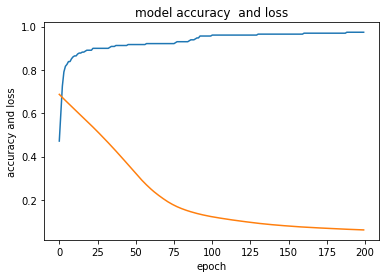

In [ ]:
# Visualize the model loss and accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy  and loss')
plt.ylabel('accuracy and loss')
plt.xlabel('epoch')



In [ ]:
# How this model does in predicting?
print ('shape of training data:', X_train.shape)
print ('shape of test data:', X_test.shape)



shape of training data: (229, 6)
shape of test data: (58, 6)


In [ ]:
#Show the actual truth and predicted value
pred = model.predict(X_test)
pred = [1 if y>=0.5 else 0 for y in pred] # do it to avoid probabilities in the prediction
pred 

print('Original  : {0}'.format(",".join(str(x) for x in y_test)))
print('Predicted : {0}'.format(",".join(str(x) for x in pred)))

Original  : 1,1,1,0,0,0,0,0,0,1,1,0,1,1,0,0,1,0,0,1,0,1,0,1,0,0,1,1,1,1,1,1,0,0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0
Predicted : 1,1,1,0,0,0,0,0,0,1,1,0,1,1,0,0,1,0,0,1,0,1,0,1,0,0,1,1,1,1,1,1,0,0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0


In [ ]:
# Show the actual values of Y (does or doesnt Kidney disease)
y_test



277    1
290    1
293    1
74     0
97     0
191    0
24     0
168    0
33     0
260    1
254    1
102    0
333    1
372    1
127    0
47     0
352    1
181    0
40     0
362    1
173    0
285    1
46     0
256    1
110    0
177    0
314    1
326    1
325    1
377    1
384    1
369    1
185    0
68     0
9      0
367    1
347    1
329    1
296    1
235    0
52     0
383    1
320    1
77     0
219    0
126    0
65     0
150    0
356    1
344    1
321    1
359    1
287    1
179    0
172    0
90     0
58     0
43     0
Name: classification, dtype: int64